### 1. Импорт библиотек и настройка визуализации

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Настройка графиков
plt.rcParams.update({
    "figure.figsize": (12, 6),
    "font.family": "DejaVu Sans"
})
sns.set_palette("deep")

# Загрузка стоп-слов
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sofiasovkova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sofiasovkova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2. Загрузка данных и анализ меток

/var/folders/rl/mld6nhhn6275t2dkp4kc06b40000gn/T/ipykernel_3055/2319610121.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Человек', 'ИИ'])  # Подписи вместо 0 и 1


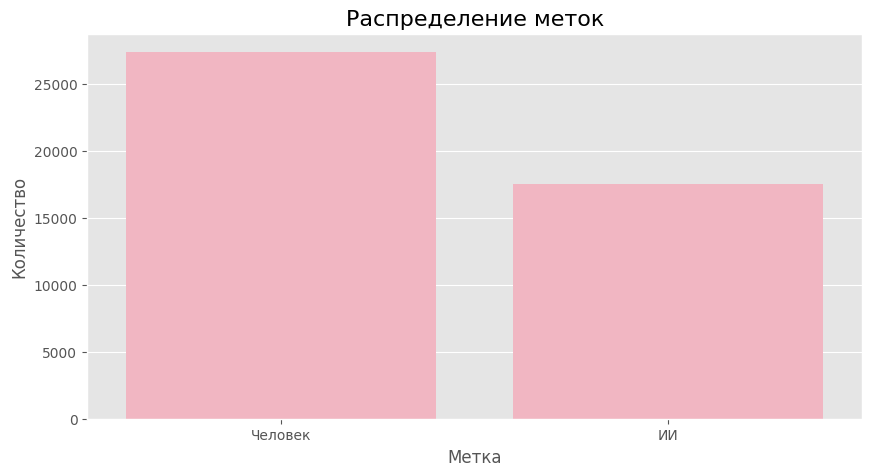

In [78]:
# Загрузка данных
df = pd.read_csv('train_v2_drcat_02.csv')

# Проверка наличия столбца меток
if 'label' in df.columns:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(data=df, x='label', color='#fbacbc')
    ax.set_xticklabels(['Человек', 'ИИ'])  # Подписи вместо 0 и 1

    plt.title('Распределение меток', fontsize=16)
    plt.xlabel('Метка', fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sofiasovkova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


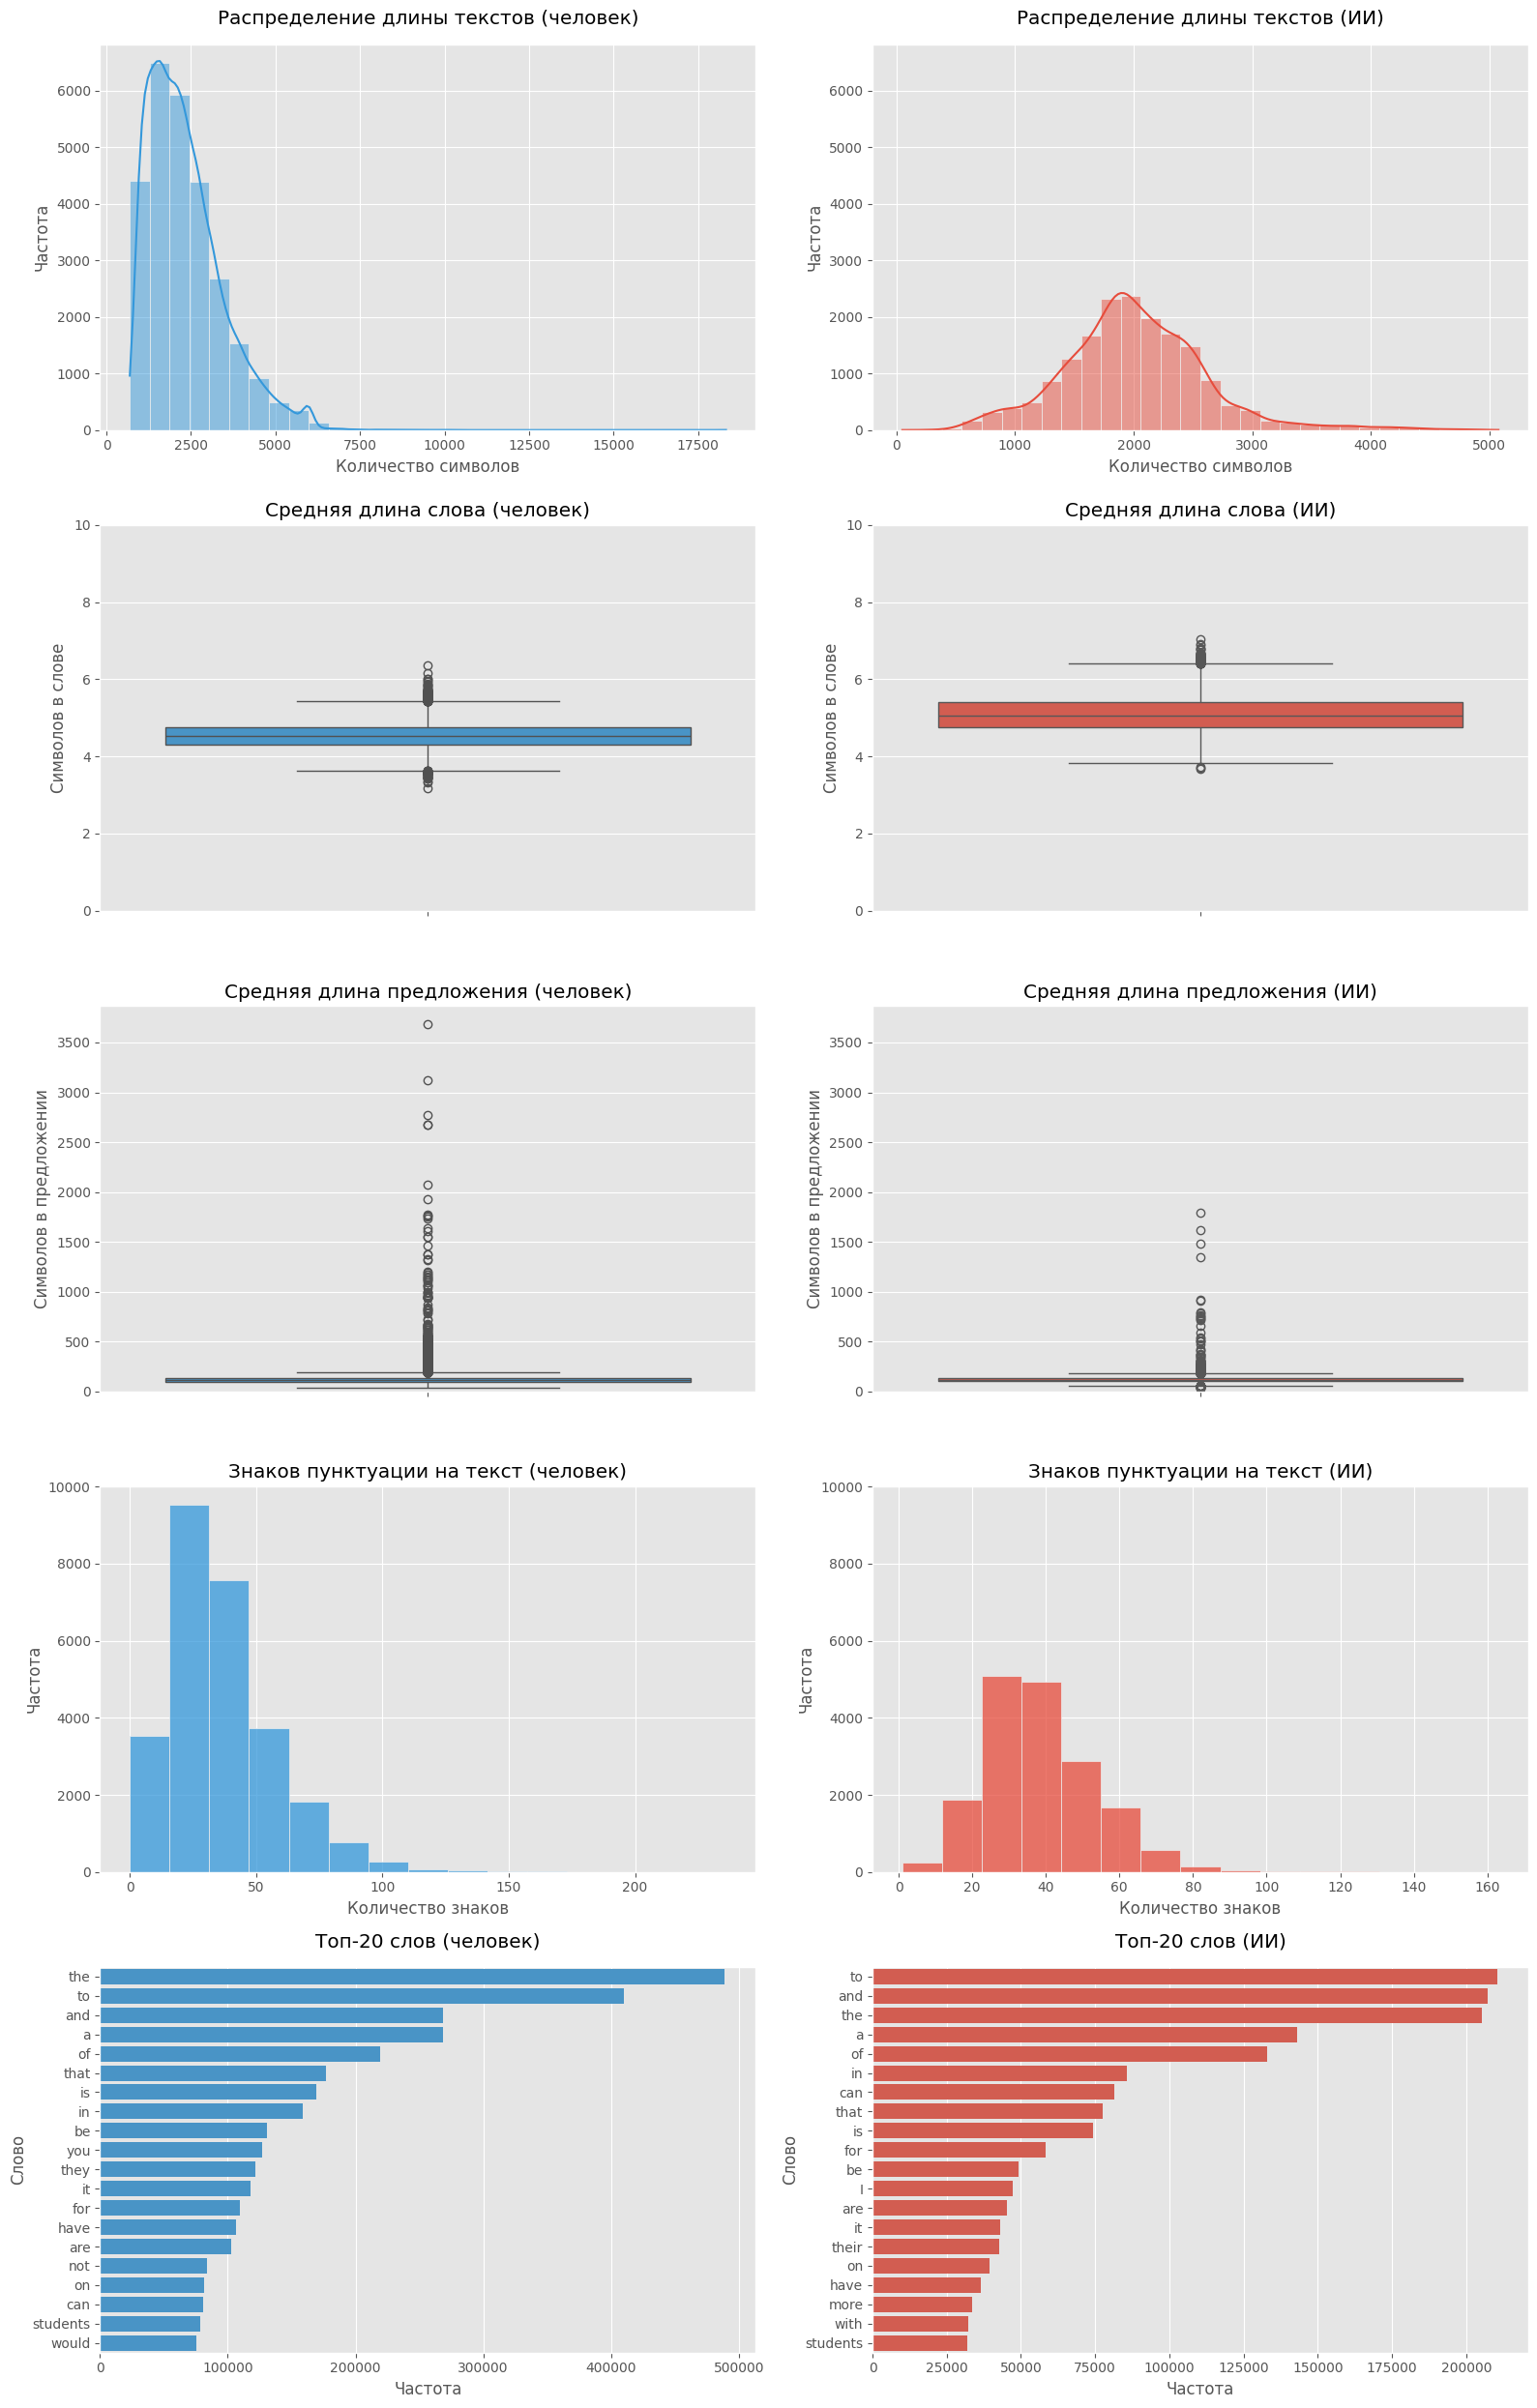

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
from collections import Counter

# Скачиваем необходимые ресурсы NLTK
nltk.download('punkt')

# Подготовка данных
human = df[df['label'] == 0]
ai = df[df['label'] == 1]

# Создаем фигуру с 5 рядами графиков
fig, axes = plt.subplots(5, 2, figsize=(16, 25))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Длина текстов (символы) - гистограммы
human_len = human['text'].apply(len)
ai_len = ai['text'].apply(len)

# Определяем общие пределы для Y
y_max_len = max(
    np.max(np.histogram(human_len, bins=30)[0]),
    np.max(np.histogram(ai_len, bins=30)[0])
) * 1.05  # Добавляем 5% запаса

sns.histplot(human_len, bins=30, kde=True, ax=axes[0,0], color='#3498db')
axes[0,0].set_title('Распределение длины текстов (человек)', pad=15)
axes[0,0].set_xlabel('Количество символов')
axes[0,0].set_ylabel('Частота')
axes[0,0].set_ylim(0, y_max_len)

sns.histplot(ai_len, bins=30, kde=True, ax=axes[0,1], color='#e74c3c')
axes[0,1].set_title('Распределение длины текстов (ИИ)', pad=15)
axes[0,1].set_xlabel('Количество символов')
axes[0,1].set_ylabel('Частота')
axes[0,1].set_ylim(0, y_max_len)

# 2. Средняя длина слова - boxplot
human_avg_len = human['text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if x else 0)
ai_avg_len = ai['text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if x else 0)

sns.boxplot(y=human_avg_len, ax=axes[1,0], color='#3498db')
axes[1,0].set_ylim(0, 10)
axes[1,1].set_ylim(0, 10)

axes[1,0].set_title('Средняя длина слова (человек)')
axes[1,0].set_ylabel('Символов в слове')

sns.boxplot(y=ai_avg_len, ax=axes[1,1], color='#e74c3c')
axes[1,1].set_title('Средняя длина слова (ИИ)')
axes[1,1].set_ylabel('Символов в слове')

# 3. Средняя длина предложения - boxplot
def avg_sentence_length(text):
    if not text.strip():
        return 0
    sentences = [s.strip() for s in text.split('.') if s.strip()]
    if not sentences:  # Дополнительная проверка
        return 0
    return np.mean([len(sent) for sent in sentences])

human_avg_sent = human['text'].apply(avg_sentence_length)
ai_avg_sent = ai['text'].apply(avg_sentence_length)

y_max_sent = max(human_avg_sent.max(), ai_avg_sent.max()) * 1.05
axes[2,0].set_ylim(0, y_max_sent)
axes[2,1].set_ylim(0, y_max_sent)

sns.boxplot(y=human_avg_sent, ax=axes[2,0], color='#3498db')
axes[2,0].set_title('Средняя длина предложения (человек)')
axes[2,0].set_ylabel('Символов в предложении')

sns.boxplot(y=ai_avg_sent, ax=axes[2,1], color='#e74c3c')
axes[2,1].set_title('Средняя длина предложения (ИИ)')
axes[2,1].set_ylabel('Символов в предложении')

# 4. Количество пунктуации - гистограммы
def count_punctuation(text):
    return sum(1 for char in text if char in '.,;:!?')

human_punct = human['text'].apply(count_punctuation)
ai_punct = ai['text'].apply(count_punctuation)

y_max_punct = max(
    np.max(np.histogram(human_punct, bins=15)[0]),
    np.max(np.histogram(ai_punct, bins=15)[0])
) * 1.05

sns.histplot(human_punct, bins=15, ax=axes[3,0], color='#3498db')
axes[3,0].set_title('Знаков пунктуации на текст (человек)')
axes[3,0].set_xlabel('Количество знаков')
axes[3,0].set_ylabel('Частота')
axes[3,0].set_ylim(0, y_max_punct)

sns.histplot(ai_punct, bins=15, ax=axes[3,1], color='#e74c3c')
axes[3,1].set_title('Знаков пунктуации на текст (ИИ)')
axes[3,1].set_xlabel('Количество знаков')
axes[3,1].set_ylabel('Частота')
axes[3,1].set_ylim(0, y_max_punct)

# 5. Функция для построения barplot частотности слов
def plot_top_words(texts, ax, title, color):
    all_words = ' '.join(texts).split()
    word_freq = Counter(all_words)
    top_words = pd.DataFrame(word_freq.most_common(20), columns=['word', 'count'])

    sns.barplot(data=top_words, y='word', x='count', ax=ax, color=color)
    ax.set_title(title, pad=15)
    ax.set_xlabel('Частота')
    ax.set_ylabel('Слово')

# Строим графики
plot_top_words(human['text'], axes[4,0], 'Топ-20 слов (человек)', '#3498db')
plot_top_words(ai['text'], axes[4,1], 'Топ-20 слов (ИИ)', '#e74c3c')

plt.tight_layout()
plt.show()